# Загрузка данных

Подгрузим все необходимые библиотеки и загрузим сам файл

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Second Wizard War DeadorAliveUpdated.csv')

In [3]:
df.head() # посмотрим на структуру таблицы

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?
0,Harry Potter,Half-blood,Human,Male,Gryffindor,Jet-black,Dementor,Stag,English,Yes
1,Minerva McGonagall,Half-blood,Human,Female,Gryffindor,Black,Lord Voldemort,Cat,Scottish,Yes
2,Kingsley Shacklebolt,Pure-blood,Human,Male,NaN,Bald,NaN,Lynx,British or Irish,Yes
3,Aberforth Dumbledore,Half-blood,Human,Male,NaN,Grey,NaN,Goat,English,Yes
4,Remus Lupin,Half-blood,Werewolf,Male,Gryffindor,Light brown flecked with grey,Fullÿmoon,Wolf,British or Irish,No


Содержимое таблицы:
- NAME - имя персонажа
- BLOOD STATUS - чистота крови: чистокровный (Pure-blood), полукровка (Half-blood), наполовину магическое существо (Half-breed), магглорождённый (Muggle-born), неизвестно, но точно не магглорождённый (Not Muggle-born)
- Species - вид: человек (Human), оборотень (Werewolf), домовой эльф (House-elf), наполовину магическое существо (Half-breed), великан (Giant)
- GENDER - пол
- HOUSE - факультет: Гриффиндор (Gryffindor), Слизерин (Slytherin), Хаффлпафф (Hufflepuff), Равенкло (Ravenclaw)
- HAIR COLOR - цвет волос
- BOGGART - боггарт (чего персонаж боится больше всего)
- PATRONUS - патронус (заклинание против дементоров; принимает форму животного)
- Nationality - этническая пренадлежность
- ALIVE? - пережил ли персонаж битву за Хогвартс

# Подготовка данных к работе

Посмотрим на базовые сведения о структуре данных: везде ли стоит правильный тип и есть ли пропуски

In [4]:
df.info() # тип данных правильный, а вот пропуски надо заменить

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          29 non-null     object
 1   BLOOD STATUS  26 non-null     object
 2   Species       29 non-null     object
 3   GENDER        29 non-null     object
 4   HOUSE         21 non-null     object
 5   HAIR COLOR    27 non-null     object
 6   BOGGART       18 non-null     object
 7   PATRONUS      21 non-null     object
 8   Nationality   26 non-null     object
 9   ALIVE?        28 non-null     object
dtypes: object(10)
memory usage: 2.4+ KB


In [5]:
# заменяем пропуски техническими значениями

df['BLOOD STATUS'] = df['BLOOD STATUS'].fillna('Unknown')
df['HOUSE'] = df['HOUSE'].fillna('Unknown')
df['HAIR COLOR'] = df['HAIR COLOR'].fillna('Unknown')
df['BOGGART'] = df['BOGGART'].fillna('Unknown')
df['PATRONUS'] = df['PATRONUS'].fillna('Unknown')
df['Nationality'] = df['Nationality'].fillna('Unknown')
df['ALIVE?'] = df['ALIVE?'].fillna('Unknown')

In [6]:
df.head() # смотрим, правильно ли всё заменилось

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?
0,Harry Potter,Half-blood,Human,Male,Gryffindor,Jet-black,Dementor,Stag,English,Yes
1,Minerva McGonagall,Half-blood,Human,Female,Gryffindor,Black,Lord Voldemort,Cat,Scottish,Yes
2,Kingsley Shacklebolt,Pure-blood,Human,Male,Unknown,Bald,Unknown,Lynx,British or Irish,Yes
3,Aberforth Dumbledore,Half-blood,Human,Male,Unknown,Grey,Unknown,Goat,English,Yes
4,Remus Lupin,Half-blood,Werewolf,Male,Gryffindor,Light brown flecked with grey,Fullÿmoon,Wolf,British or Irish,No


Смотрим, нет ли дубликатов

In [7]:
df[df.duplicated()] # дубликатов нет

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?


# Анализ

Посмотрим на базовые характеристики данных по столбцам

In [8]:
df.describe(include='object') 
# можно увидеть общее количество значений в столбце, количество уникальных значений, самое популярное значение и частоту его появления
# так как в первом столбце все значения уникальные, выводится первое по порядку

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?
count,29,29,29,29,29,29,29,29,29,29
unique,29,6,6,2,5,15,10,12,5,3
top,Harry Potter,Pure-blood,Human,Male,Gryffindor,Brown,Unknown,Unknown,English,Yes
freq,1,9,23,23,12,5,11,8,9,14


Давайте проведём анализ и узнаем, коррелирует ли чистота крови персонажа с тем, пережил ли он битву за Хогвартс (переменные BLOOD STATUS и ALIVE? соответственно). Так как обе переменные - объекты, сразу вычислить корреляцию нельзя. Поэтому создадим числовые dummies-переменные.

In [9]:
blood_cat = pd.get_dummies(df['BLOOD STATUS'])
df = pd.concat([df, blood_cat], axis = 1)

In [10]:
alive_cat = pd.get_dummies(df['ALIVE?'])
df = pd.concat([df, alive_cat], axis = 1)

In [11]:
df.head() # проверим, нормально ли всё сработало

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?,Half-blood,Half-breed,Muggle-born,Not Muggle-born,Pure-blood,Unknown,No,Unknown,Yes
0,Harry Potter,Half-blood,Human,Male,Gryffindor,Jet-black,Dementor,Stag,English,Yes,1,0,0,0,0,0,0,0,1
1,Minerva McGonagall,Half-blood,Human,Female,Gryffindor,Black,Lord Voldemort,Cat,Scottish,Yes,1,0,0,0,0,0,0,0,1
2,Kingsley Shacklebolt,Pure-blood,Human,Male,Unknown,Bald,Unknown,Lynx,British or Irish,Yes,0,0,0,0,1,0,0,0,1
3,Aberforth Dumbledore,Half-blood,Human,Male,Unknown,Grey,Unknown,Goat,English,Yes,1,0,0,0,0,0,0,0,1
4,Remus Lupin,Half-blood,Werewolf,Male,Gryffindor,Light brown flecked with grey,Fullÿmoon,Wolf,British or Irish,No,1,0,0,0,0,0,1,0,0


Теперь приступаем к самому вычислению корреляции

In [12]:
df.corr() # вычисляем коэффициент корреляции Пирсона

,Half-blood,Half-breed,Muggle-born,Not Muggle-born,Pure-blood,Unknown,No,Unknown,Yes
Half-blood,1.000000,-0.153522,-0.153522,-0.288104,-0.378394,-0.191607,0.016926,0.072993,-0.061168
Half-breed,-0.153522,1.000000,-0.074074,-0.139010,-0.182574,-0.092450,-0.228665,-0.092450,0.281718
Muggle-born,-0.153522,-0.074074,1.000000,-0.139010,-0.182574,-0.092450,0.047638,-0.092450,0.009391
Not Muggle-born,-0.288104,-0.139010,-0.139010,1.000000,-0.342624,-0.173494,0.089400,0.106024,-0.152730
Pure-blood,-0.378394,-0.182574,-0.182574,-0.342624,1.000000,-0.227866,0.041748,-0.227866,0.097725
Unknown,-0.191607,-0.092450,-0.092450,-0.173494,-0.227866,1.000000,-0.055493,0.256410,-0.101575
No,0.016926,-0.228665,0.047638,0.089400,0.041748,-0.055493,1.000000,-0.285391,-0.811679
Unknown,0.072993,-0.092450,-0.092450,0.106024,-0.227866,0.256410,-0.285391,1.000000,-0.328165
Yes,-0.061168,0.281718,0.009391,-0.152730,0.097725,-0.101575,-0.811679,-0.328165,1.000000


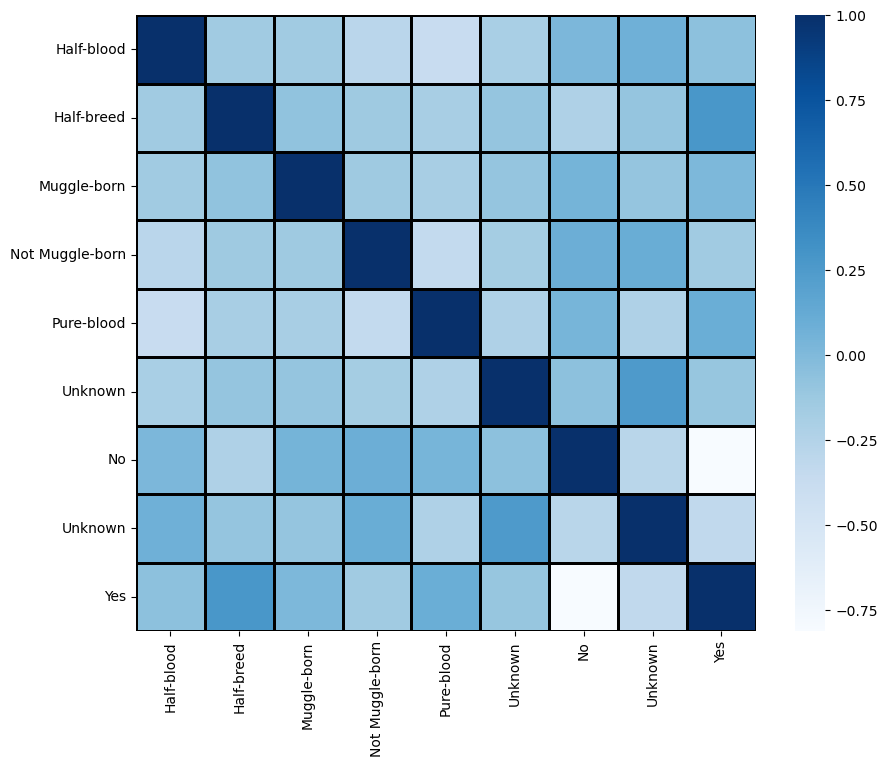

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues', linecolor='black', linewidths=1); # для наглядности создадим тепловую карту

Как мы видим, сильной корреляции нет ни у одной пары признаков (кроме пересечения признака с самим собой), то есть линейные связи отсутствуют. На общем фоне относительно выделяются только два случая: довольно сильная положительная корреляция наблюдается на пересечении BLOOD STATUS = 'Unknown' и ALIVE? = 'Unknown', а также на пересечении BLOOD STATUS = 'Half-breed' и ALIVE? = 'Yes'.

Можно предположить, что в первом случае подобная корреляция характерна для второстепенных персонажей, судьбу которых можно опустить, чтобы не перегружать сюжет.

In [14]:
df[(df['BLOOD STATUS'] == 'Unknown') & (df['ALIVE?'] == 'Unknown')] # предположение подтверждается

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?,Half-blood,Half-breed,Muggle-born,Not Muggle-born,Pure-blood,Unknown,No,Unknown,Yes
8,Fenrir Greyback,Unknown,Werewolf,Male,Unknown,Grey,Unknown,Unknown,British,Unknown,0,0,0,0,0,1,0,1,0


Для того, чтобы лучше разобраться во втором случае, выведем персонажей, соответствующих заданным условиям:

In [16]:
df[(df['BLOOD STATUS'] == 'Half-breed') & (df['ALIVE?'] == 'Yes')]

,NAME,BLOOD STATUS,Species,GENDER,HOUSE,HAIR COLOR,BOGGART,PATRONUS,Nationality,ALIVE?,Half-blood,Half-breed,Muggle-born,Not Muggle-born,Pure-blood,Unknown,No,Unknown,Yes
21,Filius Flitwick,Half-breed,Human-Goblin,Male,Ravenclaw,Blond,Lord Voldemort,Non-corporeal,British or Irish,Yes,0,1,0,0,0,0,0,0,1
25,Rubeus Hagrid,Half-breed,Human-Giant,Male,Gryffindor,Black,Lord Voldemort,None,English,Yes,0,1,0,0,0,0,0,0,1


Никакой закономерности в персонажах нет, поэтому можно допустить, что такая корреляция обусловлена авторским замыслом Джоан Роулинг

# Выводы

Предобработав данные, мы провели описательный и разведочный анализ, в ходе которого выяснили, что сильной корреляции между данными в датасете нет